# PCA Example on Small Data - Interpretation of Eigenvalues and Eigenvectors

In [1]:
import numpy as np
import pandas as pd

In [2]:
#A@A.T for variance covariance example

In [3]:
#PCA VISUALIZATION:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

RandomState(MT19937)


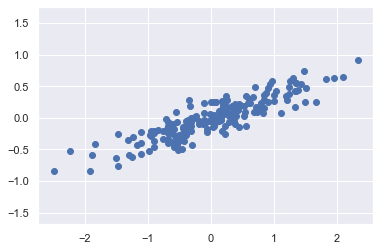

In [4]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');
print(rng)

In [5]:
X

array([[-6.25301618e-01, -1.70063657e-01],
       [ 9.60695033e-01,  5.90900597e-01],
       [-5.98543385e-01, -4.02593393e-01],
       [-2.22805938e+00, -5.32576740e-01],
       [-4.61430060e-01, -4.98867244e-01],
       [-9.58929028e-01, -2.69331024e-01],
       [-6.73079909e-01, -3.38308547e-01],
       [ 1.30501861e+00,  5.91357846e-01],
       [ 3.74545597e-01, -9.85442049e-02],
       [-1.82628627e+00, -4.06170254e-01],
       [ 6.68262284e-01,  3.36877396e-01],
       [-5.82646676e-01, -1.77369217e-01],
       [-4.18128976e-01, -3.73811389e-01],
       [ 1.72209371e-01,  2.64668836e-01],
       [ 3.77116687e-01,  1.88442969e-01],
       [-6.79396230e-01, -1.31601978e-01],
       [ 1.03148960e+00,  4.25550018e-01],
       [ 3.36041799e-01,  3.90982721e-02],
       [ 7.05745985e-01,  4.88730649e-01],
       [ 8.39511547e-01,  1.52125872e-01],
       [ 1.49882898e+00,  4.71380809e-01],
       [ 2.88356638e-01,  3.31334714e-02],
       [-5.02935011e-01, -3.68665426e-01],
       [ 1.

In [6]:
C=np.cov(X.T)
print(C)

[[0.68217761 0.23093475]
 [0.23093475 0.09883179]]


In [7]:
len(X)

200

In [8]:
X.T @ X /(len(X)-1)

array([[0.68330628, 0.23079731],
       [0.23079731, 0.09884853]])

Toy dataset Eigenvalue and Eigenvectors Example

In [9]:
Y = [[8,4,9,1,5],
[9,6,9,5,5],
[10,8,9,7,5],
[10,5,9,6,5],
[5,4,9,2,5],
[2,7,9,9,5],
[7,5,9,8,6],
[3,4,9,8,5],
[4,2,9,7,5],
[1,4,9,10,5]]
columnnames = ['Location','City','Society','Ambience','Vicinity to Airport']
rownames = ['House 1','House 2','House 3','House 4','House 5','House 6','House 7','House 8','House 9','House 10'] 

In [10]:
Y = pd.DataFrame(Y, columns = columnnames, index=rownames)

In [11]:
Y

,Location,City,Society,Ambience,Vicinity to Airport
House 1,8,4,9,1,5
House 2,9,6,9,5,5
House 3,10,8,9,7,5
House 4,10,5,9,6,5
House 5,5,4,9,2,5
House 6,2,7,9,9,5
House 7,7,5,9,8,6
House 8,3,4,9,8,5
House 9,4,2,9,7,5
House 10,1,4,9,10,5


In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3) 
results = pca.fit(Y) 

In [13]:
results

PCA(n_components=3)

In [14]:
Y_new = results.transform(Y)

In [15]:
#Check the new features
Y_new

array([[-4.67462647,  3.35894009,  0.42841034],
       [-3.37418241, -1.02889395,  0.25172469],
       [-3.23308179, -3.97071593,  0.81981191],
       [-3.49745455, -1.68008791, -1.34274586],
       [-1.67082417,  3.98811983,  1.18733207],
       [ 4.49570951, -1.28835859,  2.24687941],
       [ 0.08666565, -1.80642993, -1.02782283],
       [ 3.42329322,  0.55154083, -0.29278108],
       [ 2.24577728,  1.8688996 , -1.98746016],
       [ 6.19872372,  0.00698596, -0.2833485 ]])

In [16]:
original = results.inverse_transform(Y_new)
original
#see that the column with no variance has been returned as it is

array([[8.00177661, 3.99811762, 9.        , 1.00218308, 4.95708151],
       [8.9953121 , 6.00496701, 9.        , 4.99423954, 5.11324832],
       [9.99303271, 8.00738212, 9.        , 6.99143864, 5.16831298],
       [9.98971228, 5.01090024, 9.        , 5.98735852, 5.24852637],
       [5.00479286, 3.99492178, 9.        , 2.00588943, 4.88421617],
       [2.00066675, 6.99929355, 9.        , 9.0008193 , 4.98389284],
       [7.03177478, 4.96633339, 9.        , 8.03904463, 5.23239811],
       [2.99564339, 4.00461599, 9.        , 7.99464663, 5.10524504],
       [3.99242436, 2.00802668, 9.        , 6.99069111, 5.18300908],
       [0.99486416, 4.00544163, 9.        , 9.99368911, 5.12406958]])

In [17]:
eigenvalues = results.explained_variance_
eigenvalues

array([14.90216021,  6.17284113,  1.59473423])

In [18]:
eigenvectors = results.components_
eigenvectors
#one can notice that for third feature, the contribution of 'Society' feature is zero in all three eigenvectors because ???
#Also, for the 'fifth' feature, i.e. 'Vicinity to airport', the contribution is less because there is very less variance in the data for that feature

array([[-8.08043525e-01, -1.05099654e-01,  0.00000000e+00,
         5.79671724e-01,  6.46182619e-04],
       [-4.50728592e-01, -5.22540662e-01, -0.00000000e+00,
        -7.23006030e-01, -3.25157301e-02],
       [-3.77102721e-01,  8.44981400e-01,  1.11022302e-16,
        -3.72386432e-01, -7.16122688e-02]])

In [19]:
results.explained_variance_ratio_

array([0.65488009, 0.27126743, 0.07008109])

# SVD Example

In [20]:
A = [[1,2,300],[4,5,200],[2,2,500],[5,3,450]]

In [21]:
A = np.array(A)
A

array([[  1,   2, 300],
       [  4,   5, 200],
       [  2,   2, 500],
       [  5,   3, 450]])

In [22]:
U, sigma, V = np.linalg.svd(A)

In [23]:
A_scaled= (A-A.mean())/A.std()

In [24]:
A_scaled

array([[-0.66603469, -0.66056792,  0.96852924],
       [-0.64963438, -0.64416761,  0.42185234],
       [-0.66056792, -0.66056792,  2.06188304],
       [-0.64416761, -0.65510115,  1.78854459]])

In [25]:
U, sigma, V = np.linalg.svd(A_scaled)

In [26]:
U

array([[-0.38743174,  0.42846974, -0.29646064, -0.76054022],
       [-0.24584714,  0.79935621,  0.08853944,  0.5410634 ],
       [-0.66294901, -0.37416769, -0.55109953,  0.34174034],
       [-0.59156947, -0.19349903,  0.77495882, -0.10973841]])

In [27]:
sigma

array([3.39106032, 0.70757595, 0.00679535])

In [28]:
V

array([[ 0.3647079 ,  0.36559433, -0.85634627],
       [-0.61174494, -0.59926872, -0.51637693],
       [ 0.70196601, -0.71219224, -0.00509245]])

In [29]:
sigma = np.array([[sigma[0],0,0],[0,sigma[1],0],[0,0,sigma[2]],[0,0,0]])

In [30]:
sigma

array([[3.39106032, 0.        , 0.        ],
       [0.        , 0.70757595, 0.        ],
       [0.        , 0.        , 0.00679535],
       [0.        , 0.        , 0.        ]])

In [31]:
U@sigma@V
#notice that this is same as A_scaled

array([[-0.66603469, -0.66056792,  0.96852924],
       [-0.64963438, -0.64416761,  0.42185234],
       [-0.66056792, -0.66056792,  2.06188304],
       [-0.64416761, -0.65510115,  1.78854459]])

In [32]:
A_scaled@A_scaled.T

array([[1.81800107, 1.26677182, 2.87330514, 2.59403451],
       [1.26677182, 1.01493614, 1.72445428, 1.59497009],
       [2.87330514, 1.72445428, 5.12406161, 4.54602501],
       [2.59403451, 1.59497009, 4.54602501, 4.04300117]])

In [33]:
eval, evec = np.linalg.eig(A_scaled@A_scaled.T)

In [34]:
eval

array([ 1.14992901e+01,  5.00663727e-01, -7.42475200e-16,  4.61767674e-05])

In [35]:
eval**0.5

<ipython-input-35-58be86446ec4>:1: RuntimeWarning: invalid value encountered in sqrt
  eval**0.5


array([3.39106032, 0.70757595,        nan, 0.00679535])

In [36]:
A_scaled.T@A_scaled

array([[ 1.71692893,  1.7167795 , -3.43326014],
       [ 1.7167795 ,  1.71680938, -3.44521437],
       [-3.43326014, -3.44521437,  8.56626169]])

In [37]:
eval, evec = np.linalg.eig(A_scaled.T@A_scaled)

In [38]:
eval

array([1.14992901e+01, 4.61767674e-05, 5.00663727e-01])

In [39]:
eval**0.5
#notice that these values are same as in sigma

array([3.39106032, 0.00679535, 0.70757595])

In [40]:
B = [[1,2,3],[2,2,41],[3,4,40]]

In [41]:
eval, evec = np.linalg.eig(B)

In [42]:
eval

array([44.24710537, -0.16746589, -1.07963948])

# Applications

In [43]:
#if CV is not already installed, uncomment this and run this block of code
#import sys
#!{sys.executable} -m pip install opencv-python

In [44]:
import numpy as np
import pandas as pd
import cv2 as cv
#from cv import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

[[104. 109. 109. ...  82.  81.  81.]
 [ 96.  99.  98. ...  66.  65.  64.]
 [101. 102. 100. ...  65.  64.  64.]
 ...
 [  5.   5.   5. ...   6.   6.   6.]
 [  5.   5.   5. ...   6.   6.   6.]
 [  5.   5.   5. ...   6.   6.   6.]]


(720, 1280)

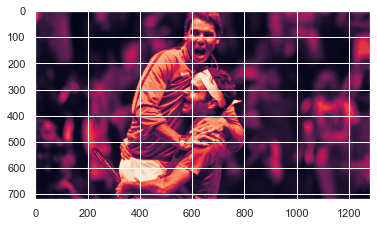

In [45]:
## TODO: LOAD IMAGE
url = "https://i.ytimg.com/vi/ybXM4nYEyD0/maxresdefault.jpg"
myImg = io.imread(url)
gray_image = cv.cvtColor(myImg, cv.COLOR_BGR2GRAY)
img_mat = np.array(list(gray_image), float)
print(img_mat)
img_mat.shape
plt.imshow(img_mat)
img_mat.shape

In [46]:
plt.show()

In [47]:
# scale the image matrix befor SVD
img_mat_scaled= (img_mat-img_mat.mean())/img_mat.std()

In [48]:
# Perform SVD using np.linalg.svd
U, s, V = np.linalg.svd(img_mat_scaled) 

In [49]:
# Compute Variance explained by each singular vector
var_explained = np.round(s**2/np.sum(s**2), decimals=3)

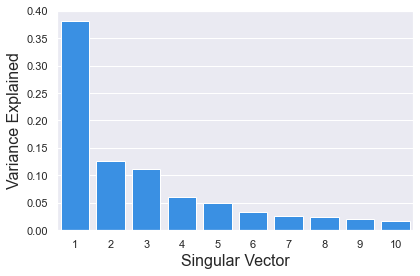

In [50]:
import seaborn as sns
sns.barplot(x=list(range(1,11)),
            y=var_explained[0:10], color="dodgerblue")
plt.xlabel('Singular Vector', fontsize=16)
plt.ylabel('Variance Explained', fontsize=16)
plt.tight_layout()
plt.show()

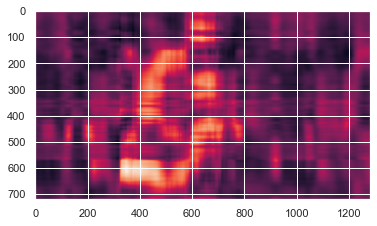

In [51]:
#Reconstruction with top 5 singular values
num_components = 5
reconst_img_5 = np.array(U[:, :num_components]) .dot(np.diag(s[:num_components]).dot(
                np.array(V[:num_components, :])))
plt.imshow(reconst_img_5)
plt.show()

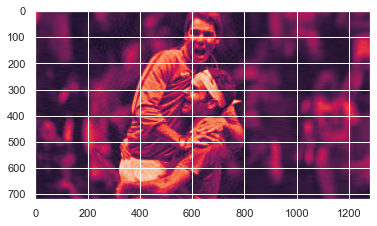

In [52]:
#Reconstruction with top 50 singular values
num_components = 50
reconst_img_50 = np.array(U[:, :num_components]) .dot(np.diag(s[:num_components]).dot(
                np.array(V[:num_components, :])))
plt.imshow(reconst_img_50)

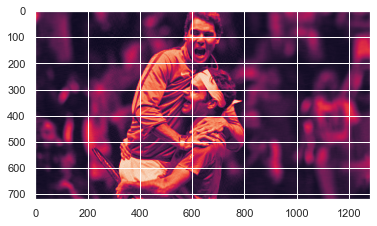

In [53]:
#Reconstruction with top 100 singular values
num_components = 100
reconst_img_100 = np.array(U[:, :num_components]) .dot(np.diag(s[:num_components]).dot(
                np.array(V[:num_components, :])))
plt.imshow(reconst_img_100)

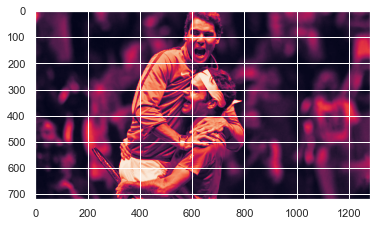

In [54]:
#Reconstruction with top 600 singular values
num_components = 600
reconst_img_600 = np.array(U[:, :num_components]) .dot(np.diag(s[:num_components]).dot(
                np.array(V[:num_components, :])))
plt.imshow(reconst_img_600)

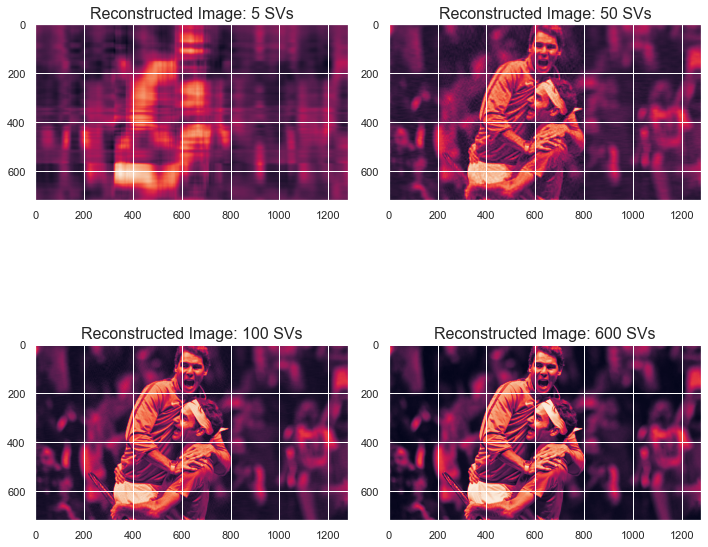

In [55]:
fig, axs = plt.subplots(2, 2,figsize=(10,10))
axs[0, 0].imshow(reconst_img_5)
axs[0, 0].set_title('Reconstructed Image: 5 SVs', size=16)
axs[0, 1].imshow(reconst_img_50)
axs[0, 1].set_title('Reconstructed Image: 50 SVs', size=16)
axs[1, 0].imshow(reconst_img_100)
axs[1, 0].set_title('Reconstructed Image: 100 SVs', size=16)
axs[1, 1].imshow(reconst_img_600)
axs[1, 1].set_title('Reconstructed Image: 600 SVs', size=16)
plt.tight_layout()
plt.show()

# LDA Examples

Wine Example

In [56]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [57]:
wine = load_wine()
X = np.array(wine.data)
y = np.array(wine.target)
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [58]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [59]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

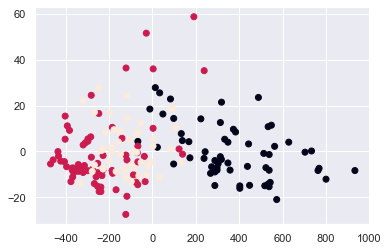

In [60]:
#Applying PCA on Wine Dataset:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # creates an instance of PCA class
results = pca.fit(X) # applies PCA on predictor variables
Z = results.transform(X) # create a new array of latent variables
plt.scatter(Z[:,0],Z[:,1], c=y)
plt.show()

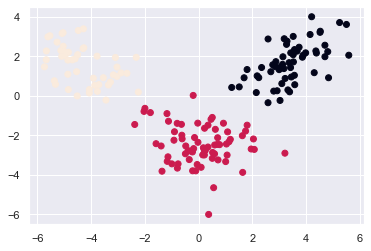

In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda =LDA(n_components = 2)
X_lda = lda.fit_transform(X, y)
plt.scatter(X_lda[:,0],X_lda[:,1], c=y)
plt.show()

In [62]:
a=lda.get_params
print(a)

<bound method BaseEstimator.get_params of LinearDiscriminantAnalysis(n_components=2)>


In [63]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(X,y,test_size=0.33, random_state=0)

In [64]:
lda.fit(xtrain,ytrain)
yn=lda.predict(xtest)

In [65]:
print(ytest)
print(yn)
print(ytest-yn)

[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1 0 2 1 2 0 2 2 0 2 0 1 2 2 1]
[0 2 1 0 1 0 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1 0 2 1 2 0 2 2 0 2 0 1 2 2 1]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Digit Classifier

In [66]:
#Import the digit data:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

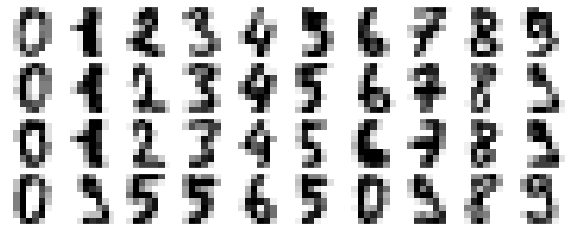

In [67]:
#Visualizing the Data
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

In [68]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(digits.data, digits.target, test_size=0.20, random_state=0)

In [69]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [70]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [71]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda =LDA(n_components = 8)
lda.fit(xtrain,ytrain)
yn=lda.predict(xtest)

In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, yn)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  1,  0,  0,  0,  1,  1],
       [ 1,  0, 33,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 28,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 38,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  2,  2, 36]], dtype=int64)

In [73]:
from sklearn.metrics import classification_report
target_names = ['d0', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9']
print(classification_report(ytest, yn, target_names=target_names))

              precision    recall  f1-score   support

          d0       0.96      1.00      0.98        27
          d1       0.94      0.91      0.93        35
          d2       1.00      0.92      0.96        36
          d3       0.90      0.97      0.93        29
          d4       0.97      0.97      0.97        30
          d5       1.00      0.93      0.96        40
          d6       1.00      0.98      0.99        44
          d7       0.93      1.00      0.96        39
          d8       0.90      0.97      0.94        39
          d9       0.90      0.88      0.89        41

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360

